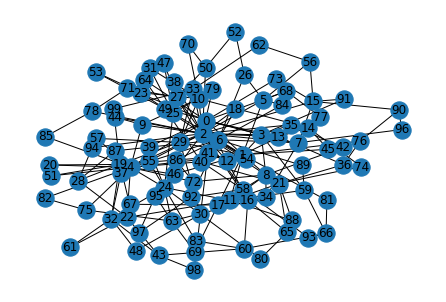

In [3]:
from ba import BAModel
bamodel=BAModel(4)
bamodel.ba_run(2,100)
bamodel.draw()

[2. 3. 1.]
15
[2.0001260955509244, 2.999746461524909, 1.0004040725889431]


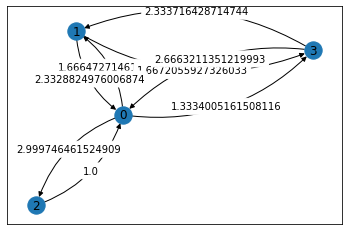

In [1]:
from grover import Grover
G=Grover([(0,1),(0,2),(0,3),(1,3)])
G.run_flowed_grover(50,[[1,2.0],[2,1.0],[3,3.0]])
G.plot()

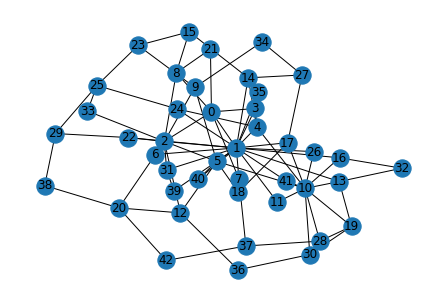

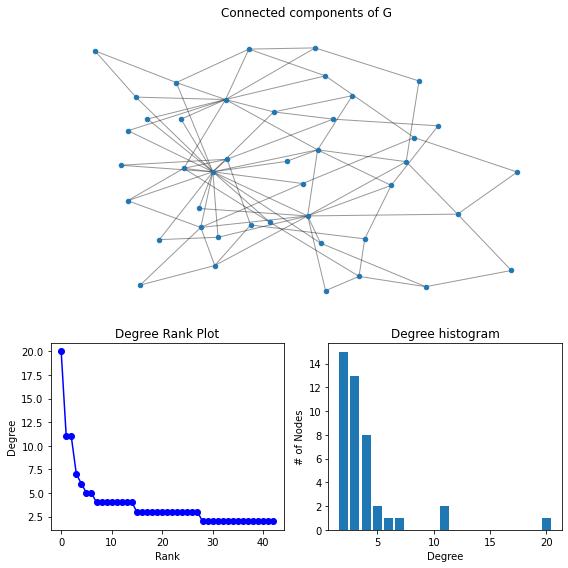

In [8]:
from grover import Grover
G=Grover([])
G.complete_graph(3)
for _ in range(40):
    G.run_flowed_grover(10000,[[0,3.0],[1,1.0]])
    G.qba_run(2,[[0,3.0],[1,1.0]])
G.plot()
G.deg_plot()